In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

### Download and verify images from .csv of Google Images URLs

In [4]:
# classes = ['russell_brand', 'jesus_christ']
# for c in classes:
#     path = Path('images')/c
#     path.mkdir(parents=True, exist_ok=True)
#     filename = str('urls_'+c+'.csv')
#     filepath = Path('images')/filename
#     download_images(filepath, path, max_pics=150)
#     print(c)
#     verify_images(path, delete=True, max_size=500)

In [5]:
np.random.seed(25)
data = ImageDataBunch.from_folder(Path('images'), train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [6]:
data.classes

['jesus_christ', 'russell_brand']

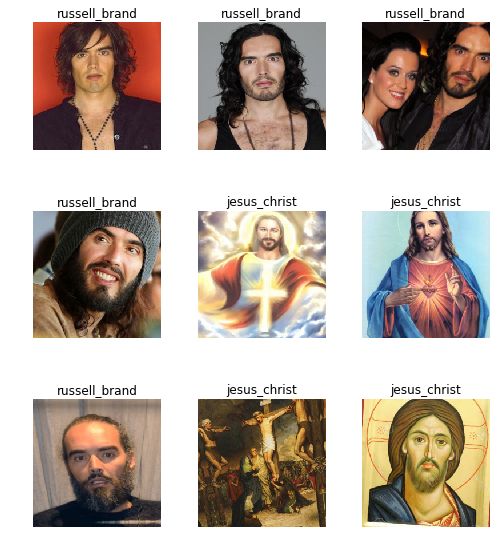

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
len(data.train_ds), len(data.valid_ds)

(229, 57)

## Training: resnet34, pretrained weights

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

In [11]:
learn.save('model-1')

## Results

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

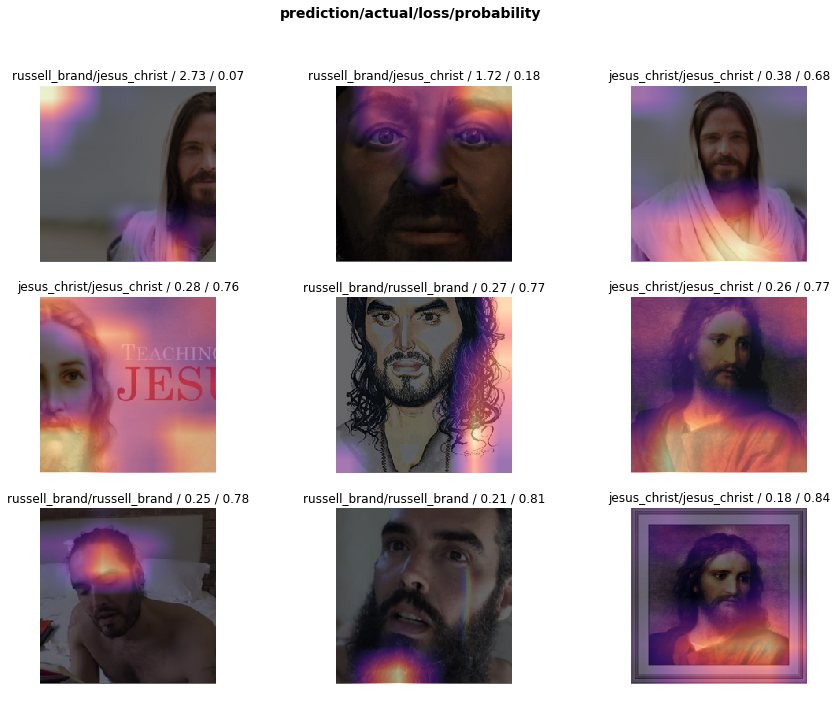

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

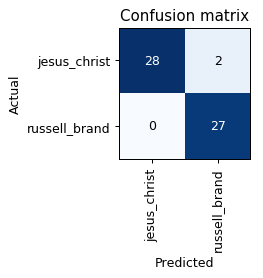

In [14]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=90)